Libraries.

In [106]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns

# Data acquisition

Importing the data.

In [107]:
# Creaos las listas
coords1 = []
# Importamos los 120 archivos de texto de especialista
for i in range(2, 76):

  # ABrimos el archivo
  with open("fbuena" + str(i) + ".txt", "r") as input_file:

    # iniciamos las variables
    coord1 = []


    # Leemos las lineas del archivo de texto
    lines = input_file.readlines()  # Lee todas las líneas excepto la primera
    for line in lines:
      values = float(line.strip())
      coord1.append(values)

    # Insertamos las listas
    coords1.append(coord1)

# Creamos las matrices
coords1 = np.array(coords1, dtype=object)
print(coord1)
#print(coords1)




[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.362, -2.7880000000000003, -4.276, -5.827999999999999, -7.455, -9.128, -10.85, -12.633, -14.472999999999999, -16.36, -18.290999999999997, -20.281, -20.945999999999998, -21.615000000000002, -20.893, -18.730000000000004, -15.036000000000001, -9.791000000000002, -1.5430000000000001, 8.464, 21.636, 38.093, 57.971000000000004, 81.35900000000001, 109.714, 141.908, 179.315, 220.803, 266.447, 317.697, 373.311, 433.421, 498.052, 567.358, 639.971, 715.942, 795.249, 876.576, 959.808, 1044.93, 1130.495, 1216.392, 1302.5190000000002, 1387.363, 1470.818, 1552.619, 1632.703, 1709.477, 1784.189, 1856.537, 1925.2210000000002, 1991.159, 2053.059, 2112.0550000000003, 2167.9839999999995, 2220.8149999999996, 2270.419, 2318.0429999999997, 2362.317, 2404.55, 2444.58, 2482.638, 2518.4570000000003, 2553.562, 2586.582, 2618.9220000000005, 2650.578, 2681.8089999999997, 2712.428, 2742.7180000000003, 2772.623, 2802.265, 2831.6330000000003, 2860.918, 28

In [108]:
# Initializing variables
coords3 = []

# Loop for importing the trainee data
for i in range(1, 76):

  # Open text file
  with open("fmala" + str(i) + ".txt", "r") as input_file:

    # Initializing variables
    coord3 = []


    # Looping each text file line
    lines = input_file.readlines()[1:]  # Lee todas las líneas excepto la primera
    for line in lines:
      values = float(line.strip())
      coord3.append(values)


      
    # Inserting the lists into the future matrices
    coords3.append(coord3)
   
# Converting the lists into matrices
coords3 = np.array(coords3, dtype=object)

print(coord3)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8290000000000001, -1.694, -2.585, -3.5120000000000005, -4.4190000000000005, -5.409000000000001, -6.4430000000000005, -7.501, -8.594000000000001, -9.713000000000001, -10.863, -12.041, -12.417, -12.785, -12.334, -11.004999999999999, -8.825000000000001, -5.657, -0.7330000000000003, 5.217999999999999, 13.068999999999999, 22.886000000000003, 34.677, 48.604, 65.46000000000001, 84.56, 106.804, 131.436, 158.46900000000002, 188.89499999999998, 221.87400000000002, 257.536, 295.91999999999996, 336.972, 380.042, 425.091, 472.12600000000003, 520.3149999999999, 569.7049999999999, 620.2159999999999, 670.9780000000001, 721.9780000000001, 773.127, 823.51, 873.104, 921.7710000000001, 969.402, 1015.141, 1059.645, 1102.822, 1143.7689999999998, 1183.23, 1220.219, 1255.496, 1289.0369999999998, 1320.6660000000002, 1350.4249999999997, 1378.96, 1405.464, 1430.7109999999998, 1454.6689999999999, 1477.2379999999998, 1498.522, 1519.216, 1538.5319999999997,

Verifying sizes.

In [109]:
# Size of tada
coords1.shape, coords3.shape

((74,), (75,))

In [110]:
print(coords1[6])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.477, -4.922, -7.353999999999999, -9.77, -12.172, -14.556, -16.93, -19.287999999999997, -21.631, -23.958, -26.275, -28.573999999999998, -28.38, -28.205, -25.552, -20.461, -12.935, -2.999000000000002, 11.821000000000002, 28.985999999999997, 50.992, 77.77199999999999, 109.315, 145.57100000000003, 189.01, 237.075, 292.241, 351.96299999999997, 416.23499999999996, 487.5, 563.247, 643.4390000000001, 728.057, 817.0699999999999, 907.9409999999999, 1000.6690000000001, 1095.269, 1189.259, 1282.688, 1375.603, 1465.4879999999998, 1552.4189999999999, 1636.411, 1715.0449999999998, 1788.3200000000002, 1856.363, 1919.2020000000002, 1974.468, 2024.696, 2070.0099999999998, 2107.929, 2141.089, 2167.051, 2188.4030000000002, 2205.147, 2217.437, 2225.257, 2231.206, 2232.8140000000003, 2232.6440000000002, 2230.6809999999996, 2226.974, 2221.498, 2216.6569999999997, 2210.17, 2204.3909999999996, 2199.303, 2194.882, 2191.045, 2187.795, 2185.078, 2182

In [111]:
# x data
x1 = coords1
#print(x1)
x1.shape

(74,)

In [112]:
x2 = coords3
#print(x2)
x2.shape

(75,)

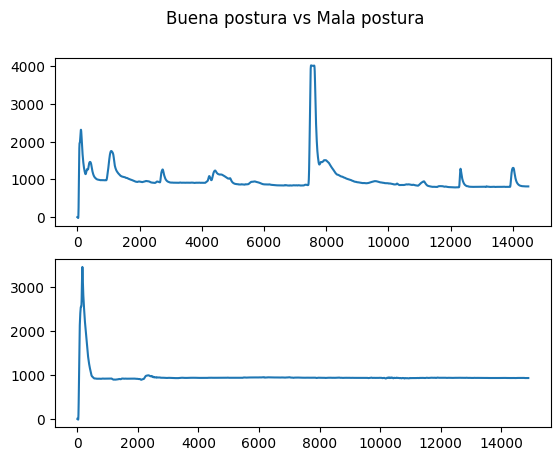

In [113]:
# Extracting trainee data

x_e = x1[20]
y_e = x2[20]


# Plot
fig, axs = plt.subplots(2)
fig.suptitle("Buena postura vs Mala postura")
axs[0].plot(x_e)
#axs[0].set_xlim([0, 640])
#axs[0].set_ylim([0, 480])
#fig.suptitle("Movimiento en Y")
axs[1].plot(y_e)
#axs[1].set_xlim([0, 640])
#axs[1].set_ylim([0, 480])
plt.show()

# Feature extraction

Feature extraction for Aprendiz.

In [114]:
from scipy.stats import kurtosis, skew
from scipy import signal
X_1 = []
for i in range(74):
  sig_x1 = np.array(x1[i])
  
  rms=np.sqrt(np.mean(sig_x1**2))
  pico=np.max(sig_x1)
  prom=np.mean(sig_x1)
  indices_activacion = np.where(sig_x1 > rms*0.3)[0] 
  indices_inactivacion = np.where(sig_x1 < rms*0.3)[0] 
  act=indices_activacion[0] / 1000
  inact=indices_inactivacion[0] / 1000
  minimo=np.min(sig_x1)
  integral = np.trapz(sig_x1)
  idx_rise = np.argmax(sig_x1)  # Índice del valor máximo
  time_rise = idx_rise / 1000  # fs es la frecuencia de muestreo

  # Calcular el tiempo de caída
  idx_fall = np.argmin(sig_x1)  # Índice del valor mínimo
  time_fall = idx_fall / 1000

  duracion_activos = (indices_activacion) [0]* 0.001
  duracion_inactivos =(indices_inactivacion)[28] * 0.001

  f,Pxx=signal.welch(sig_x1,1000)
  indice_max=np.argmax(Pxx)
  frec=f[indice_max]
  # Calcular la curtosis
  curtosis= kurtosis(sig_x1)

  # Calcular la asimetría
  asimetria= skew(sig_x1)


  X_1.append([rms,pico,prom,integral,time_rise,time_fall,duracion_activos,curtosis])


Feature extraction for Especialista.

In [115]:
from scipy.stats import kurtosis, skew
X_0 = []
for i in range(75):
  sig_x2 = np.array(x2[i])

  d1_x2 = np.diff(sig_x2)
  rms=np.sqrt(np.mean(sig_x2**2))
  pico=np.max(sig_x2)
  prom=np.mean(sig_x2)
  indices_activacion = np.where(sig_x2 > rms*0.3)[0] 
  duracion_activos = np.diff(indices_activacion)[0] * 0.001
 

  minimo=np.min(sig_x2)
  integral = np.trapz(sig_x2)
  idx_rise = np.argmax(sig_x2) 
  time_rise = idx_rise / 1000 

  f,Pxx=signal.welch(sig_x2,1000)
  indice_max=np.argmax(Pxx)
  frec=f[indice_max]



  # Calcular la duración de los períodos activos e inactivos
  indices_inactivacion = np.where(sig_x2 < rms*0.3)[0] 

  duracion_inactivos = np.diff(indices_inactivacion)[0] * 0.001

  # Calcular el tiempo de caída
  idx_fall = np.argmin(sig_x2)  # Índice del valor mínimo
  time_fall = idx_fall / 1000

  duracion_activos = (indices_activacion) [0]* 0.001
  duracion_inactivos =(indices_inactivacion)[28] * 0.001

  # Calcular la curtosis
  curtosis= kurtosis(sig_x2)

  # Calcular la asimetría
  asimetria= skew(sig_x2)

  #X_0.append([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18])
  X_0.append([rms,pico,prom,integral,time_rise,time_fall,duracion_activos,curtosis])
  #print(act)
  #print(duracion_activos)
  
#for line in X_0:
  #print(line)
  #print(f2)

# Classifiers

Generating the matrix with the features, in which every channel has a features vector.

In [116]:
X_0 = np.asarray(X_0)
X_1 = np.asarray(X_1)
X_0.shape, X_1.shape

((75, 8), (74, 8))

In [117]:
y_0 = np.zeros((X_0.shape[0], 1))
y_1 = np.ones((X_1.shape[0], 1))
y_0.shape, y_1.shape

((75, 1), (74, 1))

In [118]:
x = np.concatenate((X_0, X_1), axis=0)
y = np.concatenate((y_0, y_1), axis=0)

x.shape, y.shape

((149, 8), (149, 1))

In [119]:
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [120]:
ss_X = RobustScaler()
x_train = ss_X.fit_transform(x_train)
x_test = ss_X.transform(x_test)
x_train.shape, x_test.shape

((111, 8), (38, 8))

### Random Forest

Generating the classifier.

In [121]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

Training the model.

In [122]:
model_rf.fit(x_train, y_train)

C:\Users\vmct2\AppData\Local\Temp\ipykernel_10064\1462693802.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)
c:\Users\vmct2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=4, random_state=0)

In [124]:
pd.DataFrame(
    model_rf.feature_importances_,
    columns=["importance"],
    index=["Valor Mínimo","Valor pico","Promedio","Amplitud acumulada","Tiempo de subida","RMS","Tiempo activado","Curtosis"]
).sort_values(
    "importance",
    ascending=False
)

,importance
RMS,0.389851
Promedio,0.128911
Amplitud acumulada,0.109711
Valor Mínimo,0.091196
Curtosis,0.085173
Valor pico,0.082691
Tiempo de subida,0.059006
Tiempo activado,0.053460


Accuracy of the model

In [ ]:
print(f"El accuracy de nuestro modelo es de: {accuracy_score(y_test, model_rf.predict(x_test))*100}%")

El accuracy de nuestro modelo es de: 89.47368421052632%


Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, model_rf.predict(x_test))
pd.DataFrame(
    confusion_matrix(y_test, model_rf.predict(x_test)),
    index=["Mala", "Buena"],
    columns=["Mala Postura", "Buena Postura"]
)

,Mala Postura,Buena Postura
Mala,19,0
Buena,4,15


Values from the confusion matrix.

In [ ]:
# Values from confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
# Precision
prec = true_positives/(true_positives + false_positives) * 100
# Recall
recall = true_positives/(true_positives+false_negatives) * 100
# specificity
spe = true_negatives / (true_negatives + false_positives) * 100

print(f"El accuracy de nuestro modelo es de: {accuracy_score(y_test, model_rf.predict(x_test))*100}%")
print(f"El f1_score de nuestro modelo es de: {f1_score(y_test, model_rf.predict(x_test))*100} %")
print("La precisión de nuestro modelo es de: ", prec,"%")
print("El recall de nuestro modelo es de: ", recall,"%")
print("La especificidad de nuestro modelo es de: ", spe,"%")

El accuracy de nuestro modelo es de: 89.47368421052632%
El f1_score de nuestro modelo es de: 88.23529411764706 %
La precisión de nuestro modelo es de:  100.0 %
El recall de nuestro modelo es de:  78.94736842105263 %
La especificidad de nuestro modelo es de:  100.0 %


F1 score

In [ ]:
print(f"El f1_score de nuestro modelo es de: {f1_score(y_test, model_rf.predict(x_test))*100} %")

El f1_score de nuestro modelo es de: 88.23529411764706 %


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_rf.predict(x_test))

0.8947368421052632